In [2]:
import pickle
import pandas as pd
import numpy as np
import datetime  
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import folium
from folium.plugins import HeatMap
from math import floor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, confusion_matrix
from sqlalchemy import create_engine
from sqlalchemy import text
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import DBSCAN, OPTICS
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import csv
from shapely.geometry import Point, Polygon
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import geopandas as gpd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans
import dask.dataframe as dd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
df = pd.read_csv("Weekend_Taxi.csv")

In [4]:
df = df.drop(columns=["Unnamed: 0"])

In [5]:
df

,longitude,latitude,Hour,cluster_id,Weekday,Weekend,total_weekend_taxi_trips
0,-73.982399,40.768299,17,50,0,1,84.0
1,-73.982399,40.768299,17,50,0,1,84.0
2,-73.982399,40.768299,17,50,0,1,84.0
3,-73.982399,40.768299,17,50,0,1,84.0
4,-73.982399,40.768299,17,50,0,1,84.0
...,...,...,...,...,...,...,...
2514992,-73.919724,40.796497,1,253,0,1,32.0
2514993,-73.919724,40.796497,1,253,0,1,32.0
2514994,-73.919724,40.796497,1,253,0,1,32.0
2514995,-73.919724,40.796497,1,253,0,1,32.0


In [6]:
duplicates = df.duplicated(subset=['longitude', 'latitude', 'Hour', 'cluster_id', 'total_weekend_taxi_trips'])

In [7]:
print(duplicates.sum())

2358211


In [8]:
df = df.drop_duplicates(subset=['longitude', 'latitude', 'Hour', 'cluster_id', 'total_weekend_taxi_trips'])

In [9]:
df

,longitude,latitude,Hour,cluster_id,Weekday,Weekend,total_weekend_taxi_trips
0,-73.982399,40.768299,17,50,0,1,84.0
31,-73.982407,40.767841,17,50,0,1,84.0
62,-73.982224,40.768642,17,50,0,1,84.0
93,-73.982590,40.768318,17,50,0,1,84.0
124,-73.982124,40.768387,17,50,0,1,84.0
...,...,...,...,...,...,...,...
2514921,-73.961990,40.810429,4,475,0,1,8.0
2514928,-73.981674,40.771362,3,495,0,1,2.0
2514929,-73.933441,40.855255,17,20,0,1,19.0
2514947,-73.956841,40.783520,2,463,0,1,20.0


In [10]:
bins = [0,20,40,60,80,np.inf]

In [11]:
labels = [0,1,2,3,4]

In [12]:
df["Taxi_Trips_Busyness"] = pd.cut(df["total_weekend_taxi_trips"], bins=bins, labels=labels)

/var/folders/fq/bzr8_90x2fz7g47x1rk7l_tm0000gn/T/ipykernel_39143/4268036540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Taxi_Trips_Busyness"] = pd.cut(df["total_weekend_taxi_trips"], bins=bins, labels=labels)


In [13]:
df

,longitude,latitude,Hour,cluster_id,Weekday,Weekend,total_weekend_taxi_trips,Taxi_Trips_Busyness
0,-73.982399,40.768299,17,50,0,1,84.0,4
31,-73.982407,40.767841,17,50,0,1,84.0,4
62,-73.982224,40.768642,17,50,0,1,84.0,4
93,-73.982590,40.768318,17,50,0,1,84.0,4
124,-73.982124,40.768387,17,50,0,1,84.0,4
...,...,...,...,...,...,...,...,...
2514921,-73.961990,40.810429,4,475,0,1,8.0,0
2514928,-73.981674,40.771362,3,495,0,1,2.0,0
2514929,-73.933441,40.855255,17,20,0,1,19.0,0
2514947,-73.956841,40.783520,2,463,0,1,20.0,0


In [14]:
busyness_counts = df['Taxi_Trips_Busyness'].value_counts().sort_index()

print(busyness_counts)

0    24256
1    64949
2    40514
3    13885
4    13182
Name: Taxi_Trips_Busyness, dtype: int64


In [15]:
X = df[["longitude","latitude","Hour"]]
y = df["Taxi_Trips_Busyness"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
model = RandomForestClassifier(n_estimators=15, random_state=42)

In [82]:
model.fit(X_train, y_train.astype('int'))

RandomForestClassifier(n_estimators=15, random_state=42)

In [83]:
y_pred = model.predict(X_test)

In [84]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [85]:
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

r2 = r2_score(y_test, y_pred)
print('R-squared Score:', r2)

Mean Absolute Error: 0.07832298664852454
Mean Squared Error: 0.11446551577515095
Root Mean Squared Error: 0.3383275273683047
R-squared Score: 0.9076326279113881


In [86]:
start_time = time.time()

rf_model = RandomForestClassifier(n_estimators=15, random_state=42)
rf_model = rf_model.fit(X_train, y_train)
end_time = time.time()
rf_time = end_time - start_time
print(f"Time taken to train Random Forest model : {rf_time} seconds")

Time taken to train Random Forest model : 1.616591215133667 seconds


In [87]:
predicted_values = rf_model.predict(X_test)

In [88]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_values})
print(predictions)

        Actual  Predicted
1277358      1          1
1787841      1          1
360330       4          4
2072903      0          0
1674472      1          1
...        ...        ...
799265       2          2
390355       1          1
2510692      0          0
2100969      2          2
2107593      2          2

[47036 rows x 2 columns]


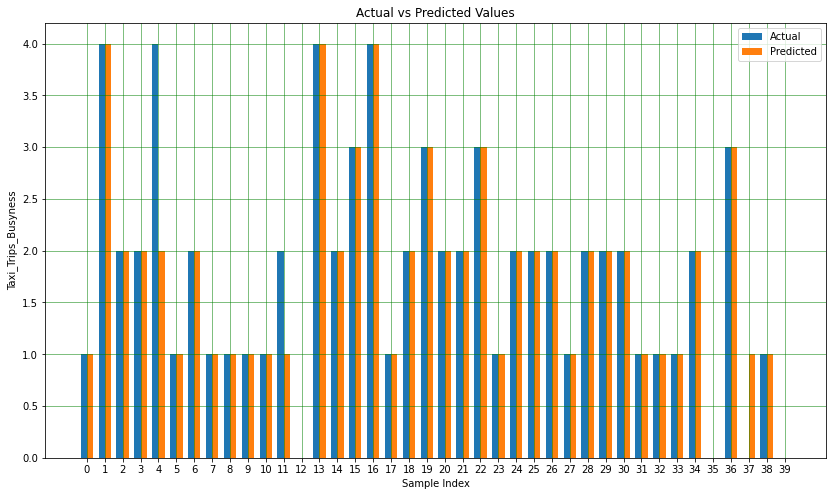

In [89]:
predictions_sample = predictions.sample(40).reset_index(drop=True)

x = np.arange(len(predictions_sample))

bar_width = 0.35

fig, ax = plt.subplots(figsize=(14,8))

rects1 = ax.bar(x - bar_width/2, predictions_sample['Actual'], bar_width, label='Actual')
rects2 = ax.bar(x + bar_width/2, predictions_sample['Predicted'], bar_width, label='Predicted')

ax.set_xlabel('Sample Index')
ax.set_ylabel('Taxi_Trips_Busyness')
ax.set_title('Actual vs Predicted Values')
ax.set_xticks(x)
ax.legend()

plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [90]:
print("Random Forest Classifier Report: \n", classification_report(y_test, predicted_values))

Random Forest Classifier Report: 
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      7264
           1       0.93      0.95      0.94     19490
           2       0.94      0.93      0.94     12122
           3       0.96      0.93      0.95      4226
           4       0.97      0.96      0.97      3934

    accuracy                           0.94     47036
   macro avg       0.95      0.93      0.94     47036
weighted avg       0.94      0.94      0.94     47036



***

## Testing Other Models

## Decision Tree Classifier

In [91]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print("Decision Tree Classifier Report: \n", classification_report(y_test, dt_predictions))

Decision Tree Classifier Report: 
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      7264
           1       0.92      0.92      0.92     19490
           2       0.92      0.92      0.92     12122
           3       0.93      0.92      0.92      4226
           4       0.96      0.96      0.96      3934

    accuracy                           0.92     47036
   macro avg       0.92      0.92      0.92     47036
weighted avg       0.92      0.92      0.92     47036



## K-Nearest Neighbors Classifier

In [92]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
print("K-Nearest Neighbors Classifier Report: \n", classification_report(y_test, knn_predictions))

K-Nearest Neighbors Classifier Report: 
               precision    recall  f1-score   support

           0       0.94      0.89      0.91      7264
           1       0.94      0.95      0.95     19490
           2       0.94      0.95      0.95     12122
           3       0.94      0.96      0.95      4226
           4       0.95      0.98      0.96      3934

    accuracy                           0.94     47036
   macro avg       0.94      0.95      0.94     47036
weighted avg       0.94      0.94      0.94     47036



### Create pkl file with RF model

In [93]:
pkl_filename = "weekend_test_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)